<a href="https://colab.research.google.com/github/sophiemknr/UTS-Machine-Learning/blob/main/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
path = '/content/drive/MyDrive/dataset/heart_modified.csv'

df = pd.read_csv(path)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,NaN,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [ ]:
df.info()
print("\nJumlah missing values tiap kolom:")
print(df.isnull().sum())

print("\n=== Statistik deskriptif (sebelum praproses) ===")
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       900 non-null    float64
 4   Cholesterol     900 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           900 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB

Jumlah missing values tiap kolom:
Age                0
Sex                0
ChestPainType      0
RestingBP         18
Cholesterol       18
FastingBS          0
RestingECG         0
MaxHR             18

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,900.000000,900.000000,918.000000,918,900.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.411111,199.252222,0.233115,NaN,136.874444,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.611534,109.644221,0.423046,NaN,25.557038,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.750000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.250000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Jumlah nilai unik:", df[col].nunique())
    print("Nilai unik:", df[col].unique())


Kolom: Age
Jumlah nilai unik: 50
Nilai unik: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Kolom: Sex
Jumlah nilai unik: 2
Nilai unik: ['M' 'F']

Kolom: ChestPainType
Jumlah nilai unik: 4
Nilai unik: ['ATA' 'NAP' 'ASY' 'TA']

Kolom: RestingBP
Jumlah nilai unik: 67
Nilai unik: [140. 160. 130. 138. 150. 120. 110. 136. 115. 100. 124. 113. 125. 145.
 112. 132. 118.  nan 170. 142. 190. 135. 180. 108. 155. 128. 106.  92.
 200. 122.  98. 105. 133.  95.  80. 137. 185. 165. 126. 152. 116.   0.
 144. 154. 134. 104. 139. 131. 141. 178. 146. 158. 123. 102.  96. 143.
 172. 156. 114. 127. 101. 174.  94. 148. 117. 192. 129. 164.]

Kolom: Cholesterol
Jumlah nilai unik: 219
Nilai unik: [289.  nan 283. 214. 195. 339. 237. 208. 207. 284. 211. 164. 204. 234.
 273. 196. 201. 248. 267. 223. 184. 288. 215. 209. 260. 468. 188. 518.
 167. 224. 172. 186. 254. 306. 250. 177. 227. 230. 294. 264. 259. 175.

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

Ukuran X: (918, 11)
Ukuran y: (918,)


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

print("Missing values setelah imputasi:")
print(X.isnull().sum())


Missing values setelah imputasi:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("Data setelah scaling & encoding:")
X.head()

Data setelah scaling & encoding:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.412038,0.827141,-0.551341,1,1.388846,0,-0.832432,2
1,-0.478484,0,2,1.497937,0.000000,-0.551341,1,0.756215,0,0.105664,1
2,-1.751359,1,1,-0.130911,0.771843,-0.551341,2,-1.537075,0,-0.832432,2
3,-0.584556,0,0,0.303448,0.135920,-0.551341,1,-1.141681,1,0.574711,1
4,0.051881,1,2,0.954988,-0.039190,-0.551341,1,-0.588128,0,-0.832432,2


In [ ]:
print("=== Statistik setelah praproses ===")
X.describe()

=== Statistik setelah praproses ===


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,9.180000e+02,918.000000,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,918.000000,9.180000e+02,918.000000
mean,-1.083616e-16,0.789760,0.781046,7.275710e-16,-3.096047e-17,-3.096047e-17,0.989107,-7.894919e-16,0.404139,1.238419e-16,1.361656
std,1.000545e+00,0.407701,0.956519,1.000545e+00,1.000545e+00,1.000545e+00,0.631671,1.000545e+00,0.490992,1.000545e+00,0.607056
min,-2.706015e+00,0.000000,0.000000,-7.189253e+00,-1.836365e+00,-5.513413e-01,0.000000,-3.039576e+00,0.000000,-3.271482e+00,0.000000
25%,-6.906294e-01,1.000000,0.000000,-6.738605e-01,-2.189072e-01,-5.513413e-01,1.000000,-6.672068e-01,0.000000,-8.324324e-01,1.000000
50%,5.188098e-02,1.000000,0.000000,-1.309111e-01,2.096499e-01,-5.513413e-01,1.000000,2.473414e-02,0.000000,-2.695748e-01,1.000000
75%,6.883185e-01,1.000000,2.000000,4.120382e-01,6.220785e-01,-5.513413e-01,1.000000,7.166751e-01,1.000000,5.747115e-01,2.000000
max,2.491558e+00,1.000000,3.000000,3.669734e+00,3.721053e+00,1.813758e+00,2.000000,2.575031e+00,1.000000,4.983762e+00,2.000000


Akurasi: 0.8405797101449275

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        56
           1       0.91      0.82      0.86        82

    accuracy                           0.84       138
   macro avg       0.84      0.85      0.84       138
weighted avg       0.85      0.84      0.84       138



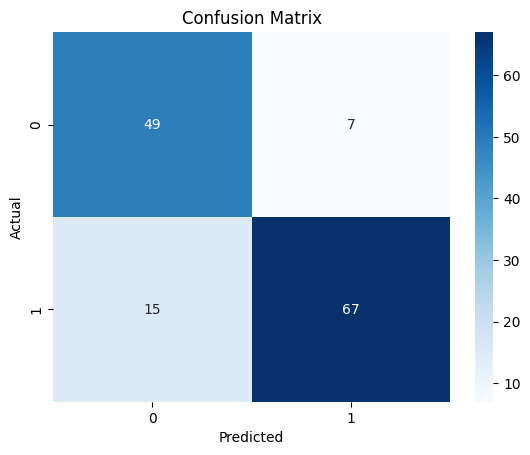

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

sse = kmeans.inertia_
sil_score = silhouette_score(X, kmeans.labels_)

print("SSE (Sum of Squared Errors):", sse)
print("Silhouette Score:", sil_score)

SSE (Sum of Squared Errors): 6072.823821257892
Silhouette Score: 0.1753789791653597


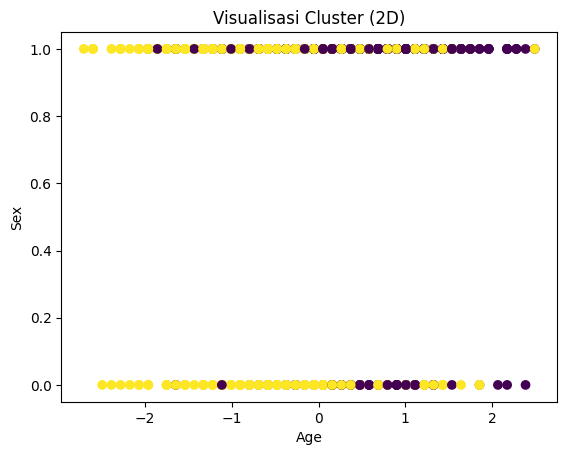

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualisasi Cluster (2D)')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()